In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import RandomForestRegressor

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import yfinance as yf

In [5]:
bse_data=yf.download('^BSESN',start='2015-01-01',end='2021-04-30')
unseenbse_data=yf.download('^BSESN',start='2021-04-30',end='2021-05-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
bse_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
unseenbse_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
bse_data.rename(columns={'Open':'open ','High':'high','Low':'low','Close':'close','Adj Close':'adjclose','Volume':'volume'},inplace=True)
bse_data.head()

,open,high,low,close,adjclose,volume
Date,,,,,,
2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400
2015-01-05,27978.429688,28064.490234,27786.849609,27842.320312,27842.320312,9200
2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100
2015-01-07,26983.429688,27051.599609,26776.119141,26908.820312,26908.820312,12200
2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200


In [9]:
unseenbse_data.rename(columns={'Date':'date','Open':'open ','High':'high','Low':'low','Close':'close','Adj Close':'adjclose','Volume':'volume'},inplace=True)
unseenbse_data

,open,high,low,close,adjclose,volume
Date,,,,,,
2021-04-30,49360.890625,49569.421875,48698.078125,48782.359375,48782.359375,19400


In [10]:
bse_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1552 entries, 2015-01-02 to 2021-04-29
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      1552 non-null   float64
 1   high      1552 non-null   float64
 2   low       1552 non-null   float64
 3   close     1552 non-null   float64
 4   adjclose  1552 non-null   float64
 5   volume    1552 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 84.9 KB


In [11]:
unseenbse_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1 entries, 2021-04-30 to 2021-04-30
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      1 non-null      float64
 1   high      1 non-null      float64
 2   low       1 non-null      float64
 3   close     1 non-null      float64
 4   adjclose  1 non-null      float64
 5   volume    1 non-null      int64  
dtypes: float64(5), int64(1)
memory usage: 56.0 bytes


In [12]:
bse_data.reset_index(inplace=True)

In [13]:
bse_data.rename(columns={'Date': 'date'}, inplace = True)
bse_data.head()

,date,open,high,low,close,adjclose,volume
0,2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400
1,2015-01-05,27978.429688,28064.490234,27786.849609,27842.320312,27842.320312,9200
2,2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100
3,2015-01-07,26983.429688,27051.599609,26776.119141,26908.820312,26908.820312,12200
4,2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200


In [14]:
unseenbse_data.reset_index(inplace=True)

In [15]:
unseenbse_data.rename(columns={'Date': 'date'}, inplace = True)

In [16]:
unseenbse_data

,date,open,high,low,close,adjclose,volume
0,2021-04-30,49360.890625,49569.421875,48698.078125,48782.359375,48782.359375,19400


In [17]:
bse_data['date']=pd.to_datetime(bse_data['date'],format='%Y%m%d')

In [18]:
unseenbse_data['date']=pd.to_datetime(unseenbse_data['date'],format='%Y%m%d')

In [19]:
#  First Calculate Actual Price

In [20]:
unseenbse_data_price=round((unseenbse_data['high']+unseenbse_data['low']+unseenbse_data['close'])/3,2)
unseenbse_data_price

0    49016.62
dtype: float64

In [21]:
# Rolling Window Analysis Of Time Series

In [22]:
def stock_weekmovingavg(wks,df):
    dateclose_data=pd.DataFrame({'date':df['date'],'close':df['close']})
    dateclose_data.set_index('date',inplace=True)
    num=wks*5
    dateclose_data['movingavg']=dateclose_data['close'].rolling(window=num).mean().shift()
    return dateclose_data.dropna()

In [23]:
stock_weekmovingavg(4,bse_data).head()

,close,movingavg
date,,
2015-02-02,29122.269531,28256.509570
2015-02-03,29000.140625,28318.228027
2015-02-04,28883.109375,28376.119043
2015-02-05,28850.970703,28470.901465
2015-02-06,28717.910156,28568.008984


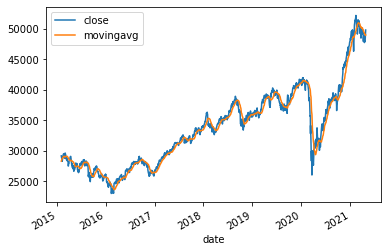

In [24]:
stock_weekmovingavg(4,bse_data).plot()

In [25]:
altdata_fourweek = stock_weekmovingavg(4, bse_data)
altdata_fourweek.reset_index(inplace=True)
altdata_fourweek.rename(columns={list(altdata_fourweek)[0]:'date'}, inplace=True)


In [26]:
import altair as alt
alt.Chart(altdata_fourweek).mark_point().encode(x='date',y='movingavg')

alt.Chart(...)

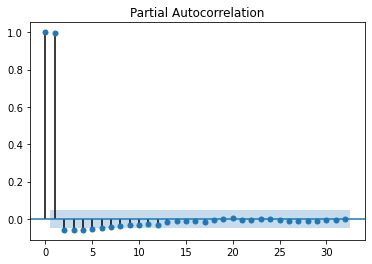

In [27]:
import statsmodels.api as sm 
plotfourweek=altdata_fourweek.filter(['date','movingavg'],axis=1)
plotfourweek.index=pd.Index(sm.tsa.datetools.dates_from_range('2015',length=len(altdata_fourweek['date'])))
del plotfourweek['date']
sm.graphics.tsa.plot_pacf(plotfourweek.values.squeeze())
plt.show()

In [28]:
stock_weekmovingavg(16,bse_data).head()

,close,movingavg
date,,
2015-05-05,27440.140625,28447.880933
2015-05-06,26717.369141,28442.283936
2015-05-07,26599.109375,28428.222046
2015-05-08,27105.390625,28423.367651
2015-05-11,27507.300781,28425.824780


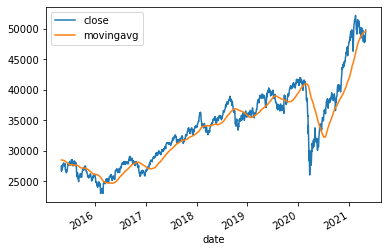

In [29]:
stock_weekmovingavg(16 ,bse_data).plot()
plt.show()

In [30]:
altdata_sixteenweek=stock_weekmovingavg(16,bse_data)
altdata_sixteenweek.reset_index(inplace=True)
altdata_sixteenweek.rename(columns={list(altdata_sixteenweek)[0]:'date'},inplace=True)

In [31]:
alt.Chart(altdata_sixteenweek).mark_point().encode(x='date',y='movingavg')

alt.Chart(...)

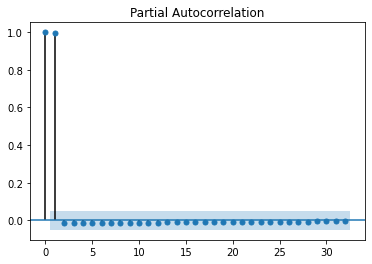

In [32]:
plotsixteenweek=altdata_sixteenweek.filter(['date','movingavg'],axis=1)
plotsixteenweek.index=pd.Index(sm.tsa.datetools.dates_from_range('2015',length=len(altdata_sixteenweek['date'])))
del plotsixteenweek['date']
sm.graphics.tsa.plot_pacf(plotsixteenweek.values.squeeze())
plt.show()

In [33]:
stock_weekmovingavg(52,bse_data).head()

,close,movingavg
date,,
2016-01-25,24485.949219,27198.907963
2016-01-27,24492.390625,27185.823535
2016-01-28,24469.570312,27172.939190
2016-01-29,24870.689453,27163.254995
2016-02-01,24824.830078,27155.416031


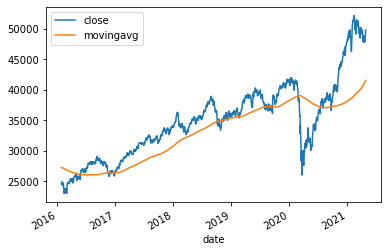

In [34]:
stock_weekmovingavg(52,bse_data).plot()

In [35]:
altdata_fiftytwoweek=stock_weekmovingavg(52,bse_data)
altdata_fiftytwoweek.reset_index(inplace=True)
altdata_fiftytwoweek.rename(columns={list(altdata_fiftytwoweek)[0]:'date'},inplace=True)

In [36]:
alt.Chart(altdata_fiftytwoweek).mark_point().encode(x='date',y='movingavg')

alt.Chart(...)

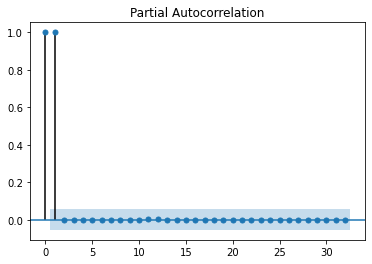

In [37]:
plotfiftytwoweek=altdata_fiftytwoweek.filter(['date','movingavg'],axis=1)
plotfiftytwoweek.index=pd.Index(sm.tsa.datetools.dates_from_range('2015',length=len(altdata_fiftytwoweek['date'])))
del plotfiftytwoweek['date']
sm.graphics.tsa.plot_pacf(plotfiftytwoweek.values.squeeze())
plt.show()

In [38]:
# Creating Rolling Window of Size 10 and 50 of the BSE Index

In [39]:
def rollingwindow(days,df):
    data=df.filter(['date','open','high','low','close'],axis=1)
    data.set_index('date',inplace=True)
    rollingwindow_data=data.rolling(window=days).mean().shift()
    return rollingwindow_data.dropna()

In [40]:
rollingwindow(10,bse_data).head()

,high,low,close
date,,,
2015-01-16,27657.483008,27279.612891,27479.296484
2015-01-19,27681.345898,27322.217969,27502.695508
2015-01-20,27708.302930,27363.268945,27544.664453
2015-01-21,27821.338867,27502.047852,27724.385352
2015-01-22,28011.988867,27703.692969,27922.389258


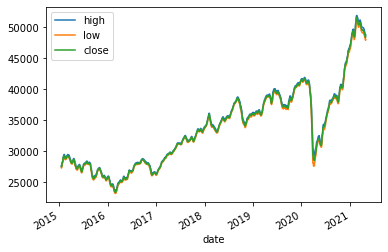

In [41]:
rollingwindow(10,bse_data).plot()

In [42]:
altdata_tendays=rollingwindow(10,bse_data)
altdata_tendays.reset_index(inplace=True)
altdata_tendays.rename(columns={list(altdata_tendays)[0]:'date'},inplace=True)

In [43]:
alt.Chart(altdata_tendays).mark_point().encode(x='date',y='close')

alt.Chart(...)

In [44]:
rollingwindow(50,bse_data).head()

,high,low,close
date,,,
2015-03-18,28863.956836,28502.767422,28670.602461
2015-03-19,28881.346836,28523.317422,28685.286836
2015-03-20,28899.631836,28535.814414,28697.833828
2015-03-23,28915.340430,28561.266406,28723.306211
2015-03-24,28942.011250,28589.022031,28748.970195


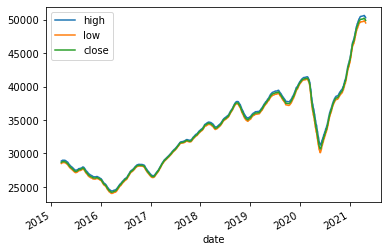

In [45]:
rollingwindow(50,bse_data).plot()

In [46]:
altdata_fiftydays=rollingwindow(50,bse_data)
altdata_fiftydays.reset_index(inplace=True)
altdata_fiftydays.rename(columns={list(altdata_fiftydays)[0]:'date'},inplace=True)

In [47]:
alt.Chart(altdata_fiftydays).mark_point().encode(x='date',y='close')

alt.Chart(...)

In [48]:
# Creating Dummy Time Series:

In [49]:
def boolean_shock(percent,df,col):
    data=df.filter(['date',col],axis=1)
    data.set_index('date',inplace=True)
    data['percentchg']=(data[col].pct_change())*100
    data['shock']=data['percentchg'].apply(lambda x:1 if x>=percent else 0)
    data.drop(col,axis=1,inplace=True)
    return data.dropna()

In [50]:
boolean_shock(10,bse_data,'volume').head()

,percentchg,shock
date,,
2015-01-05,24.324324,1
2015-01-06,53.260870,1
2015-01-07,-13.475177,0
2015-01-08,-32.786885,0
2015-01-09,35.365854,1


In [51]:
altdata_volpercentchg=boolean_shock(10,bse_data,'volume')
altdata_volpercentchg.reset_index(inplace=True)
altdata_volpercentchg.rename(columns={list(altdata_volpercentchg)[0]:'date'},inplace=True)

In [52]:
alt.Chart(altdata_volpercentchg).mark_point().encode(x='date',y='percentchg')

alt.Chart(...)

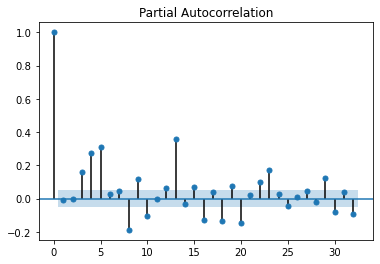

In [53]:
plotvolpercentchg=altdata_volpercentchg.filter(['date','percentchg'],axis=1)
plotvolpercentchg.index = pd.Index(sm.tsa.datetools.dates_from_range('2015', length=len(altdata_volpercentchg['date']))) 
del plotvolpercentchg['date']
sm.graphics.tsa.plot_pacf(plotvolpercentchg.values.squeeze())
plt.show()

In [54]:
boolean_shock(2,bse_data,'close').head()

,percentchg,shock
date,,
2015-01-05,-0.163440,0
2015-01-06,-3.070360,0
2015-01-07,-0.291397,0
2015-01-08,1.359742,0
2015-01-09,0.673407,0


In [55]:
altdata_closepercentchg=boolean_shock(2,bse_data,'close')
altdata_closepercentchg.reset_index(inplace=True)
altdata_closepercentchg.rename(columns={list(altdata_closepercentchg)[0]:'date'},inplace=True)

In [56]:
alt.Chart(altdata_closepercentchg).mark_point().encode(x='date',y='percentchg')

alt.Chart(...)

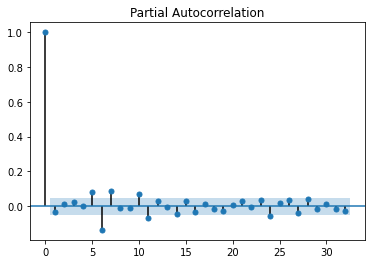

In [57]:
plotclosepercentchg=altdata_closepercentchg.filter(['date','percentchg'],axis=True)
plotclosepercentchg.index=pd.Index(sm.tsa.datetools.dates_from_range('2015',length=len(altdata_closepercentchg['date'])))
del plotclosepercentchg['date']
sm.graphics.tsa.plot_pacf(plotclosepercentchg.values.squeeze())
plt.show()

In [58]:
boolean_shock(10,bse_data,'close').head()

,percentchg,shock
date,,
2015-01-05,-0.163440,0
2015-01-06,-3.070360,0
2015-01-07,-0.291397,0
2015-01-08,1.359742,0
2015-01-09,0.673407,0


In [59]:
altdata_closepercentchg10=boolean_shock(10,bse_data,'close')
altdata_closepercentchg10.reset_index(inplace=True)
altdata_closepercentchg10.rename(columns={list(altdata_closepercentchg10)[0]:'date'},inplace=True)

In [60]:
alt.Chart(altdata_closepercentchg10).mark_point().encode(x='date',y='percentchg')

alt.Chart(...)

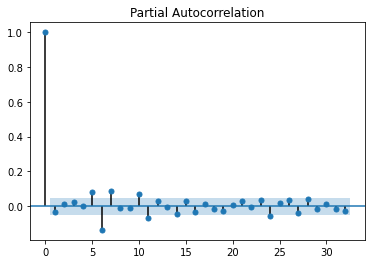

In [61]:
plotpercentchg10=altdata_closepercentchg10.filter(['date','percentchg'],axis=1)
plotpercentchg10.index=pd.Index(sm.tsa.datetools.dates_from_range('2015',length=len(altdata_closepercentchg10['date'])))
del plotpercentchg10['date']
sm.graphics.tsa.plot_pacf(plotpercentchg10.values.squeeze())
plt.show()

In [62]:
# Creating The Reverse Dummy Time Series:

In [63]:
def reverseboolean_shock(percent, df, col):
    data = df.filter(['date', col], axis=1) 
    data.set_index('date', inplace=True)
    data = data.reindex(index=data.index[::-1])
    data['percentchg'] = (data[col].pct_change()) * 100
    data['shock'] = data['percentchg'].apply(lambda x: 1 if x > percent else 0)
    data.drop(col, axis = 1, inplace = True)
    data = data.reindex(index=data.index[::-1])
    return data.dropna()

In [64]:
reverseboolean_shock(2,bse_data,'close').head()

,percentchg,shock
date,,
2015-01-02,0.163708,0
2015-01-05,3.167617,1
2015-01-06,0.292249,0
2015-01-07,-1.341501,0
2015-01-08,-0.668903,0


In [65]:
altdata_closepercentchg=reverseboolean_shock(2,bse_data,'close')
altdata_closepercentchg.reset_index(inplace=True)
altdata_closepercentchg.rename(columns={list(altdata_closepercentchg)[0]:'date'},inplace=True)

In [66]:
alt.Chart(altdata_closepercentchg).mark_point().encode(x='date',y='percentchg')

alt.Chart(...)

In [67]:
reverseboolean_shock(5,bse_data,'close').head()

,percentchg,shock
date,,
2015-01-02,0.163708,0
2015-01-05,3.167617,0
2015-01-06,0.292249,0
2015-01-07,-1.341501,0
2015-01-08,-0.668903,0


In [68]:
altdata_closepercentchg5=reverseboolean_shock(5,bse_data,'close')
altdata_closepercentchg5.reset_index(inplace=True)
altdata_closepercentchg5.rename(columns={list(altdata_closepercentchg5)[0]:'date'},inplace=True)

In [69]:
alt.Chart(altdata_closepercentchg5).mark_point().encode(x='date',y='percentchg')

alt.Chart(...)

In [70]:
# Time Series For Pricing Shock without Volume Shock:

In [71]:
def pricereverseboolean_shock(percent, df):
    data = df.filter(['date', 'high', 'low','close'], axis=1)
    data.set_index('date', inplace=True)
    data = data.reindex(index=data.index[::-1])
    data['reversepriceavg'] = (data['high'] + data['low'] + data['close']) / 3
    data['shock'] = (data['reversepriceavg'].pct_change()) * 100
    data['shock'] = data['shock'].apply(lambda x: 1 if x >= percent else 0)
    data.drop(['high', 'low', 'close'], axis = 1, inplace = True)
    data = data.reindex(index=data.index[::-1])
    return data.dropna()

In [72]:
pricereverseboolean_shock(2,bse_data).head()

,reversepriceavg,shock
date,,
2015-01-02,27781.543620,0
2015-01-05,27897.886719,1
2015-01-06,27207.817057,0
2015-01-07,26912.179688,0
2015-01-08,27231.020182,0


In [73]:
altdata_reversepricingpercentchg=pricereverseboolean_shock(2,bse_data)
altdata_reversepricingpercentchg.reset_index(inplace=True)
altdata_reversepricingpercentchg.rename(columns={list(altdata_reversepricingpercentchg)[0]:'date'},inplace=True)

In [74]:
alt.Chart(altdata_reversepricingpercentchg).mark_point().encode(x='date',y='reversepriceavg')

alt.Chart(...)

In [75]:
# Textual Analysis of news from Times of India News Headlines

In [76]:
news=pd.read_csv(r'E:\Inernship\india-news-headlines.csv')
news.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [77]:
news.columns

Index(['publish_date', 'headline_category', 'headline_text'], dtype='object')

In [78]:
news.shape

(3424067, 3)

In [79]:
news['publish_date']=pd.to_datetime(news['publish_date'],format='%Y%m%d')

In [80]:
news.head()

,publish_date,headline_category,headline_text
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2,2001-01-02,unknown,America's unwanted heading for India?
3,2001-01-02,unknown,For bigwigs; it is destination Goa
4,2001-01-02,unknown,Extra buses to clear tourist traffic


In [81]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424067 entries, 0 to 3424066
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   publish_date       datetime64[ns]
 1   headline_category  object        
 2   headline_text      object        
dtypes: datetime64[ns](1), object(2)
memory usage: 78.4+ MB


In [82]:
news['headline_category'].unique()

array(['unknown', 'entertainment.hindi.bollywood', 'india', ...,
       'elections.assembly-elections.bihar',
       'astrology.horoscope.monthly', 'astrology.numerology-tarot'],
      dtype=object)

In [83]:
news['headline_category'].value_counts()

india                                                    288541
unknown                                                  209582
city.mumbai                                              134428
city.delhi                                               127717
business.india-business                                  116761
                                                          ...  
sports.cricket.icc-world-cup.teams.england                    8
scorecard-and-statistics                                      8
brandwire.technology.internet-apps                            8
business.faqs.gst-faqs                                        8
best-products.home-decor-and-garden.living-room-decor         8
Name: headline_category, Length: 1013, dtype: int64

In [84]:
news['headline_category'].value_counts().count()

1013

In [85]:
news['headline_text'].value_counts()

Straight Answers                                                6723
Cartoons                                                        1536
Straight answers                                                1500
Photogallery                                                    1353
Your say                                                        1012
                                                                ... 
UN to step up efforts for Lanka women                              1
Arjun: No foreign fly-by-night operators in education sector       1
Blasphemy row: Mob in Pak raids Christian colony                   1
MHA team says Garo-Rabha clashes 'well planned'                    1
NMC to resume sterilization of stray dogs                          1
Name: headline_text, Length: 3168800, dtype: int64

In [86]:
news['headline_text'].value_counts().count()

3168800

In [87]:
news.isnull().sum()

publish_date         0
headline_category    0
headline_text        0
dtype: int64

In [88]:
news.duplicated().sum()

24191

In [89]:
news.duplicated(keep=False).sum()

46130

In [90]:
cols=list(news.columns)
news.sort_values(by=cols,inplace=True,ignore_index=True)

In [91]:
news[news.duplicated(keep=False)]

,publish_date,headline_category,headline_text
3,2001-01-02,unknown,America's unwanted heading for India?
4,2001-01-02,unknown,America's unwanted heading for India?
5,2001-01-02,unknown,America's unwanted heading for India?
6,2001-01-02,unknown,America's unwanted heading for India?
9,2001-01-02,unknown,BBC's reality TV will focus on AIIMS
...,...,...,...
3421893,2020-12-27,city.nagpur,Govt forcing helpless sr citizens to fight leg...
3422119,2020-12-28,city.bareilly,Rampur's Hunar Haat a platform for artisans fr...
3422120,2020-12-28,city.bareilly,Rampur's Hunar Haat a platform for artisans fr...
3422956,2020-12-29,city.pune,PMC to draft separate DP after 23 villages' me...


In [92]:
news.drop_duplicates(keep='last',inplace=True,ignore_index=True)

In [93]:
news.duplicated().sum()

0

In [94]:
from textblob import TextBlob

In [95]:
lst=news['publish_date'].value_counts().index.tolist()

In [96]:
new=[]
for x in lst:
    df=news.loc[news['publish_date']==x]
    headlinetext=' '
    publishdate=str(x)
    headlinetext=df['headline_text'].iloc[0]
    for i in range(1,len(df)):
        headlinetext=headlinetext+'. '+df['headline_text'].iloc[i]
    new.append(headlinetext)
        

In [97]:
newsdf=pd.DataFrame({'publish_date':lst,'headline_text':new})

In [98]:
newsdf

,publish_date,headline_text
0,2014-12-15,Golden Homes III. Golden Panorama. Hanging Gar...
1,2014-12-21,Eight companies add Rs 55;171 crore in m-cap; ...
2,2014-12-09,Audi-Vredestein driving experience. Benelli TN...
3,2014-11-29,6 CARE IPO merchant bankers fined Rs 1 crore. ...
4,2014-11-01,Chetan Bhagat: Cleanliness begins at home. Gau...
...,...,...
7257,2001-03-16,Tape and Tell
7258,2001-03-17,Crouching Tiger; Hidden Dragon
7259,2001-06-05,Darkness Triumphs
7260,2001-04-01,Indians attacked by 'monkey man'


In [99]:
newsdf.sort_values(by='publish_date',inplace=True,ignore_index=True)

In [100]:
newsdf.head()

,publish_date,headline_text
0,2001-01-02,Raju Chacha. A noisy effort to spruce up Comme...
1,2001-01-03,'Devdas': Jinxed?. 10-year-old girl missing. 3...
2,2001-01-04,Car dealers caught in Bihar sales tax ruling. ...
3,2001-01-05,Nepal won't allow anti-India activities: Envoy...
4,2001-01-06,Anti-immigration think-tank berates Clinton re...


In [101]:
newsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7262 entries, 0 to 7261
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   publish_date   7262 non-null   datetime64[ns]
 1   headline_text  7262 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 113.6+ KB


In [102]:
#We can calculate the sentiment using TextBlob. 
#Based on the polarity, we determine whether it is a positive text or negative or neutral.

In [103]:
polarity=[]
subjectivity=[]
for idx,row in newsdf.iterrows():
    polarity.append(TextBlob(row['headline_text']).sentiment[0])
    subjectivity.append(TextBlob(row['headline_text']).sentiment[1])

In [104]:
newsdf['polarity']=polarity
newsdf['subjectivity']=subjectivity

In [105]:
newsdf.head()

,publish_date,headline_text,polarity,subjectivity
0,2001-01-02,Raju Chacha. A noisy effort to spruce up Comme...,0.193519,0.293056
1,2001-01-03,'Devdas': Jinxed?. 10-year-old girl missing. 3...,0.088462,0.407692
2,2001-01-04,Car dealers caught in Bihar sales tax ruling. ...,0.091426,0.481895
3,2001-01-05,Nepal won't allow anti-India activities: Envoy...,0.257415,0.465542
4,2001-01-06,Anti-immigration think-tank berates Clinton re...,0.219481,0.464935


In [106]:
newsdf.isnull().sum()

publish_date     0
headline_text    0
polarity         0
subjectivity     0
dtype: int64

In [107]:
newsdf.rename(columns={'publish_date':'date'},inplace=True)

In [108]:
newsdf=newsdf.filter(['date','polarity','subjectivity'],axis=1)

In [109]:
newsdf.shape

(7262, 3)

In [110]:
newsdf['date'].duplicated().sum()

0

In [111]:
bse_data.shape

(1552, 7)

In [112]:
bse_data['date'].duplicated().sum()

0

In [113]:
bse_data=pd.merge(bse_data,newsdf,how='left',on=['date'])

In [114]:
bse_data.head()

,date,open,high,low,close,adjclose,volume,polarity,subjectivity
0,2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400,0.055586,0.455251
1,2015-01-05,27978.429688,28064.490234,27786.849609,27842.320312,27842.320312,9200,0.100081,0.433132
2,2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100,0.055802,0.386579
3,2015-01-07,26983.429688,27051.599609,26776.119141,26908.820312,26908.820312,12200,0.034707,0.386916
4,2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200,0.060173,0.408416


In [115]:
bse_data.shape

(1552, 9)

In [116]:
bse_data.isnull().sum()

date             0
open             0
high             0
low              0
close            0
adjclose         0
volume           0
polarity        78
subjectivity    78
dtype: int64

In [117]:
# Preparation Dataset for Machine Learning:

In [118]:
bse_data.loc[len(bse_data)] = ['2021-04-30',bse_data['date'].mean(),bse_data['high'].mean(), bse_data['low'].mean(),
                       bse_data['close'].mean(), bse_data['adjclose'].mean(), bse_data['volume'].median(), 
                               newsdf['polarity'].mean(), newsdf['subjectivity'].mean() ]

In [119]:
bse_data['date']=pd.to_datetime(bse_data['date'],format='%Y-%m-%d')

In [120]:
bse_data.head()

,date,open,high,low,close,adjclose,volume,polarity,subjectivity
0,2015-01-02,27521.3,27937.470703,27519.259766,27887.900391,27887.900391,7400.0,0.055586,0.455251
1,2015-01-05,27978.4,28064.490234,27786.849609,27842.320312,27842.320312,9200.0,0.100081,0.433132
2,2015-01-06,27694.2,27698.929688,26937.060547,26987.460938,26987.460938,14100.0,0.055802,0.386579
3,2015-01-07,26983.4,27051.599609,26776.119141,26908.820312,26908.820312,12200.0,0.034707,0.386916
4,2015-01-08,27178.8,27316.410156,27101.939453,27274.710938,27274.710938,8200.0,0.060173,0.408416


In [121]:
bse_data["month"] = bse_data['date'].dt.month
bse_data["day"] = bse_data['date'].dt.day
bse_data["dayofweek"] = bse_data['date'].dt.dayofweek
bse_data["week"] = bse_data['date'].dt.week
bse_data['movingavg4weeks'] = round(bse_data['close'].rolling(window=(4*5), min_periods = 1).mean().shift(),2)
bse_data['movingavg16weeks'] = round(bse_data['close'].rolling(window=(16*5), min_periods = 1).mean().shift(),2) 
#add 12 weeks to 4 weeks 
bse_data['movingavg28weeks'] = round(bse_data['close'].rolling(window=(28*5), min_periods = 1).mean().shift(),2)
#add 12 weeks to 16 weeks
bse_data['movingavg40weeks'] = round(bse_data['close'].rolling(window=(40*5), min_periods = 1).mean().shift(),2)
#add 12 weeks to 28 weeks
bse_data['movingavg52weeks'] = round(bse_data['close'].rolling(window=(52*5), min_periods = 1).mean().shift(),2) 
#add 12 weeks to 40 weeks
bse_data['window10days'] = round(bse_data['close'].rolling(window = 10, min_periods = 1).mean().shift(),2)  
bse_data['window50days'] = round(bse_data['close'].rolling(window = 50, min_periods = 1).mean().shift(),2)
bse_data['volumeshock'] = round(boolean_shock(10, bse_data, 'volume').reset_index()['shock'], 2)
bse_data['closeshock2'] = round(reverseboolean_shock(2, bse_data, 'close').reset_index()['shock'], 2)
bse_data['closeshock5'] = round(reverseboolean_shock(5, bse_data, 'close').reset_index()['shock'],2)
bse_data['closeshock10'] = round(reverseboolean_shock(10, bse_data, 'close').reset_index()['shock'], 2)
bse_data['priceshock'] = round(pricereverseboolean_shock(10, bse_data).reset_index()['shock'], 2)
bse_data['reversebooleanshock2'] = round(reverseboolean_shock(2, bse_data, 'close').reset_index()['shock'], 2)
bse_data['reversebooleanshock5'] = round(reverseboolean_shock(5, bse_data, 'close').reset_index()['shock'], 2)
bse_data['pricereverseshock2'] = round(pricereverseboolean_shock(2, bse_data).reset_index()['shock'], 2)
bse_data['polarity'] = round(bse_data['polarity'] , 2)
bse_data['subjectivity'] = round(bse_data['subjectivity'] , 2)
bse_data['price'] = round((bse_data['high'] + bse_data['low'] + bse_data['close']) / 3 , 2)
bse_data['close'] = round(bse_data['close'] , 2)

In [122]:
bse_data.columns

Index(['date', 'open ', 'high', 'low', 'close', 'adjclose', 'volume',
       'polarity', 'subjectivity', 'month', 'day', 'dayofweek', 'week',
       'movingavg4weeks', 'movingavg16weeks', 'movingavg28weeks',
       'movingavg40weeks', 'movingavg52weeks', 'window10days', 'window50days',
       'volumeshock', 'closeshock2', 'closeshock5', 'closeshock10',
       'priceshock', 'reversebooleanshock2', 'reversebooleanshock5',
       'pricereverseshock2', 'price'],
      dtype='object')

In [123]:
bse_data.head()

,date,open,high,low,close,adjclose,volume,polarity,subjectivity,month,...,window50days,volumeshock,closeshock2,closeshock5,closeshock10,priceshock,reversebooleanshock2,reversebooleanshock5,pricereverseshock2,price
0,2015-01-02,27521.3,27937.470703,27519.259766,27887.90,27887.900391,7400.0,0.06,0.46,1,...,NaN,1.0,0.0,0.0,0.0,0,0.0,0.0,0,27781.54
1,2015-01-05,27978.4,28064.490234,27786.849609,27842.32,27842.320312,9200.0,0.10,0.43,1,...,27887.90,1.0,1.0,0.0,0.0,0,1.0,0.0,1,27897.89
2,2015-01-06,27694.2,27698.929688,26937.060547,26987.46,26987.460938,14100.0,0.06,0.39,1,...,27865.11,0.0,0.0,0.0,0.0,0,0.0,0.0,0,27207.82
3,2015-01-07,26983.4,27051.599609,26776.119141,26908.82,26908.820312,12200.0,0.03,0.39,1,...,27572.56,0.0,0.0,0.0,0.0,0,0.0,0.0,0,26912.18
4,2015-01-08,27178.8,27316.410156,27101.939453,27274.71,27274.710938,8200.0,0.06,0.41,1,...,27406.63,1.0,0.0,0.0,0.0,0,0.0,0.0,0,27231.02


In [124]:
bse_data.fillna(method='bfill',inplace=True)

In [125]:
bse_data.fillna(method='ffill',inplace=True)

In [126]:
bse_data.isnull().sum()

date                    0
open                    0
high                    0
low                     0
close                   0
adjclose                0
volume                  0
polarity                0
subjectivity            0
month                   0
day                     0
dayofweek               0
week                    0
movingavg4weeks         0
movingavg16weeks        0
movingavg28weeks        0
movingavg40weeks        0
movingavg52weeks        0
window10days            0
window50days            0
volumeshock             0
closeshock2             0
closeshock5             0
closeshock10            0
priceshock              0
reversebooleanshock2    0
reversebooleanshock5    0
pricereverseshock2      0
price                   0
dtype: int64

In [127]:
bse_data=bse_data.filter(['month', 'day', 'dayofweek', 'week',
       'movingavg4weeks', 'movingavg16weeks', 'movingavg28weeks',
       'movingavg40weeks', 'movingavg52weeks', 'window10days', 'window50days',
       'volumeshock', 'closeshock2', 'closeshock5', 'closeshock10',
       'priceshock', 'reversebooleanshock2', 'reversebooleanshock5',
       'pricereverseshock2', 'polarity', 'subjectivity', 'price', 'close'], axis=1)

In [128]:
bse_data

,month,day,dayofweek,week,movingavg4weeks,movingavg16weeks,movingavg28weeks,movingavg40weeks,movingavg52weeks,window10days,...,closeshock5,closeshock10,priceshock,reversebooleanshock2,reversebooleanshock5,pricereverseshock2,polarity,subjectivity,price,close
0,1,2,4,1,27887.90,27887.90,27887.90,27887.90,27887.90,27887.90,...,0.0,0.0,0,0.0,0.0,0,0.06,0.46,27781.54,27887.90
1,1,5,0,2,27887.90,27887.90,27887.90,27887.90,27887.90,27887.90,...,0.0,0.0,0,1.0,0.0,1,0.10,0.43,27897.89,27842.32
2,1,6,1,2,27865.11,27865.11,27865.11,27865.11,27865.11,27865.11,...,0.0,0.0,0,0.0,0.0,0,0.06,0.39,27207.82,26987.46
3,1,7,2,2,27572.56,27572.56,27572.56,27572.56,27572.56,27572.56,...,0.0,0.0,0,0.0,0.0,0,0.03,0.39,26912.18,26908.82
4,1,8,3,2,27406.63,27406.63,27406.63,27406.63,27406.63,27406.63,...,0.0,0.0,0,0.0,0.0,0,0.06,0.41,27231.02,27274.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,4,26,0,17,48969.67,49480.71,46440.43,43901.55,41265.64,48501.50,...,0.0,0.0,0,0.0,0.0,0,0.07,0.40,48402.24,48386.51
1549,4,27,1,17,48886.42,49504.99,46518.98,43963.38,41345.62,48365.53,...,0.0,0.0,0,0.0,0.0,0,0.07,0.40,48784.31,48944.14
1550,4,28,2,17,48874.62,49529.63,46597.29,44025.66,41418.22,48300.81,...,0.0,0.0,0,0.0,0.0,0,0.07,0.40,49533.99,49733.84
1551,4,29,3,17,48939.30,49559.38,46681.29,44090.96,41494.53,48485.86,...,1.0,1.0,1,1.0,1.0,1,0.07,0.40,49892.56,49765.94


In [129]:
#separating the predicted date row from main dataset after getting all the calculated average values

In [130]:
main_bsedata=bse_data.iloc[:1345,:].reset_index()
newtestunseen_bsedata=bse_data.iloc[1345:,:].reset_index()

In [131]:
main_bsedata.shape

(1345, 24)

In [132]:
newtestunseen_bsedata.shape

(208, 24)

In [133]:
newtestunseen_bsedata

,index,month,day,dayofweek,week,movingavg4weeks,movingavg16weeks,movingavg28weeks,movingavg40weeks,movingavg52weeks,...,closeshock5,closeshock10,priceshock,reversebooleanshock2,reversebooleanshock5,pricereverseshock2,polarity,subjectivity,price,close
0,1345,6,30,1,27,34278.20,32331.09,36094.84,36953.09,37293.01,...,0.0,0.0,0,0.0,0.0,0,0.07,0.38,34987.50,34915.80
1,1346,7,1,2,27,34332.71,32288.82,36053.70,36941.00,37273.13,...,0.0,0.0,0,0.0,0.0,0,0.06,0.36,35269.63,35414.45
2,1347,7,2,3,27,34397.96,32254.70,36014.87,36935.26,37257.31,...,0.0,0.0,0,0.0,0.0,0,0.04,0.44,35817.99,35843.70
3,1348,7,3,4,27,34491.11,32219.95,35979.62,36930.86,37242.80,...,0.0,0.0,0,0.0,0.0,0,0.06,0.36,36001.34,36021.42
4,1349,7,6,0,28,34577.81,32190.10,35948.02,36927.74,37228.32,...,0.0,0.0,0,0.0,0.0,0,0.04,0.41,36467.65,36487.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,1548,4,26,0,17,48969.67,49480.71,46440.43,43901.55,41265.64,...,0.0,0.0,0,0.0,0.0,0,0.07,0.40,48402.24,48386.51
204,1549,4,27,1,17,48886.42,49504.99,46518.98,43963.38,41345.62,...,0.0,0.0,0,0.0,0.0,0,0.07,0.40,48784.31,48944.14
205,1550,4,28,2,17,48874.62,49529.63,46597.29,44025.66,41418.22,...,0.0,0.0,0,0.0,0.0,0,0.07,0.40,49533.99,49733.84
206,1551,4,29,3,17,48939.30,49559.38,46681.29,44090.96,41494.53,...,1.0,1.0,1,1.0,1.0,1,0.07,0.40,49892.56,49765.94


In [134]:
# Training The Model:

In [135]:
x=main_bsedata.drop(['price','close'],axis=1)
y=main_bsedata[['price','close']]

In [136]:
xnewtestunseen=newtestunseen_bsedata.drop(['price','close'],axis=1)
ynewtestunseen=newtestunseen_bsedata[['price','close']]

In [137]:
x.shape,y.shape

((1345, 22), (1345, 2))

In [138]:
xnewtestunseen.shape,ynewtestunseen.shape

((208, 22), (208, 2))

In [139]:
split=ShuffleSplit(n_splits=10,test_size=0.2,random_state=42)
for train_index,test_index in split.split(x,y):
    x_train,x_test=x.iloc[train_index],x.iloc[test_index]
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]

In [140]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1076, 22), (269, 22), (1076, 2), (269, 2))

In [141]:
rfg=RandomForestRegressor(random_state=42,n_estimators=500,criterion='mse',max_depth=30,min_samples_leaf=2,min_samples_split=5,
                          n_jobs=1)

In [142]:
chainedmodel = RegressorChain(rfg)
chainedmodel.fit(x_train, y_train)

RegressorChain(base_estimator=RandomForestRegressor(max_depth=30,
                                                    min_samples_leaf=2,
                                                    min_samples_split=5,
                                                    n_estimators=500, n_jobs=1,
                                                    random_state=42))

In [145]:
pred = chainedmodel.predict(x_test)
roundpred = []
for x in range(len(pred)):
    roundpred.append([round(pred[x][0], 2),round(pred[x][1], 2) ])

In [146]:
r2_score(y_test,roundpred)

0.9946378158682396

In [147]:
print('MAE')
print(mean_absolute_error(y_test,roundpred),end='\n')
print('MSE')
print(mean_squared_error(y_test,roundpred),end='\n')
print('RMSE')
print(np.sqrt(mean_squared_error(y_test,roundpred)))

MAE
256.3928624535317
MSE
129959.76939479557
RMSE
360.4993334179629


In [148]:
pred_newtestunseen=chainedmodel.predict(xnewtestunseen)

In [149]:
[(round(pred_newtestunseen[0][0], 2)),(round(pred_newtestunseen[0][1], 2))]

[35032.67, 34994.59]

In [150]:
ynewtestunseen

,price,close
0,34987.50,34915.80
1,35269.63,35414.45
2,35817.99,35843.70
3,36001.34,36021.42
4,36467.65,36487.28
...,...,...
203,48402.24,48386.51
204,48784.31,48944.14
205,49533.99,49733.84
206,49892.56,49765.94


In [151]:
[unseenbse_data_price[0] , round(unseenbse_data['close'],2)[0]]

[49016.62, 48782.36]

In [152]:
# Conclusion:
# The model predicted for 30th April 2021 the price ((high+low+close)/3) i.e the average of high, low, 
# close of BSE index to be 35032.67 and closing price to be 34994.59

#And the actual price ((high+low+close)/3) i.e the average of high, low,
# close of BSE index on day 30th April 2021 was 49016.62, and closing price was 48782.36